In [ ]:
import sys

sys.path.append("./../../src")


from utils import collate_fn
from Dataset import SpeechCommandsDataset
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
from IPython.display import Audio


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_dataset = SpeechCommandsDataset("./../../data/train")

train_loader = DataLoader(
    train_dataset, batch_size=64, shuffle=True, collate_fn=collate_fn
)

for batch in train_loader:
    waveforms, labels = batch
    max_val = 0
    for i, waveform in enumerate(waveforms):
        if waveform.shape[1] > max_val:
            max_val = waveform.shape[1]
    print(max_val)
    break

16000


In [ ]:
waveform = waveforms[2]
sr = 16000

Audio(waveform.squeeze().numpy(), rate=sr)

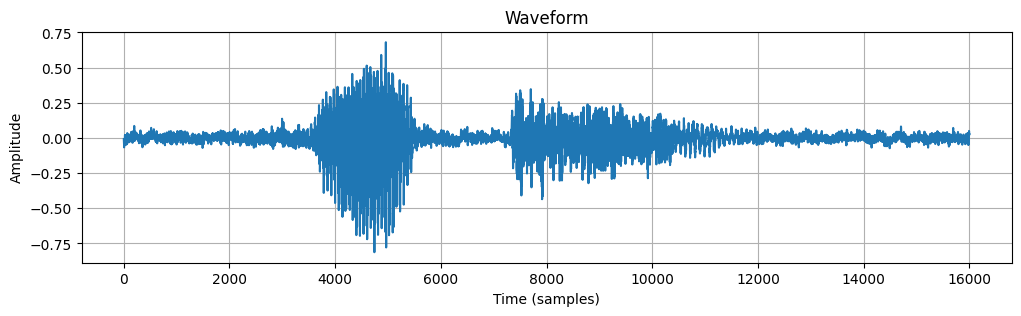

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(waveform.squeeze().numpy())
plt.title("Waveform")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

It is safe to assume that max length of recording is 16000